In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import inflect
import html
import re
from symspellpy import SymSpell, Verbosity
import pkg_resources
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_rows", 25)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 1000)

In [3]:
work = pd.read_excel('Suicide and deepression data.xlsx')
work.head(5)

,text,label
0,I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts. I just want to lose feelings so all this pain can stop it hurts so much and I cannot even cry about it. I do not want to hurt her because she said she does not want to never speak to me again but I do not know what to do here. When we were together she always hurt me so I do not know why I still love her. I wish we never met it would be much less painful How do I lose feelings?,depression
1,NaN,NaN
2,"I do not know how to navigate these feelings, not that its a new feeling by any stretch. I just do not understand how I can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it. I have been suffering from poor mental health for over 10 years and I am about to turn 26 next week and I feel so ashamed for how serious my negative thoughts are. Covid was a hard transition especially having moved to a new city a few months before everything started locking down, but now I am here and settled and I have a loving partner, a great connection to their family, a really fun job and I finished my degree. But when I stop and look around I feel like nothing will ever be good enough for me and I will never be good enough, I will always have skin problems and bad teeth and acne. I will never be the artist I used to be (I have a Bachelor in fine art) because I do not have the same drive or passionate that I used to have for it. I will ...",depression
3,"So I have been with my bf for 5 months , and he already told me he was depressed. To this week nothing particular happened, but i can now feel hes bothered by it. He does not ask me to sleep together, do things and etcI know I am not the problem I am aware of that, I just wanted to ask: how can I be there without suffocating him? I am really clingy, a thing which he usually loves about me but right now I kind of have a feeling that I am doing too much.Any suggestion will be gladly accepted, be frank and tell me how I can not make it worse: its that that bothers me. My bf (21) is having a bad time due to his depression",depression
4,"I am so exhausted of this. Just when I think I can finally rest, just when I think maybe things are starting to settle, another hurdle comes flying at me. This month alone we found out my mum could be dying, my girlfriend left me, my parents revealed that they wanted a divorce, my grandad was hospitalised again and just now my little sister's been rushed to A&amp;E with possible brain damage. If there is a god up there they must fucking hate me. it is like life is trying to get me to kill myself and honestly I think I would be better off dead. I attempted when I was 12 but I was stupid and there was no way I could cut deep enough. Now I am 15 and everything is so much worse than it ever has been and I just cannot hold on much longer -- it is going to take a miracle to get me through this. I feel so alone. I feel like the world hates me and I have no idea what I did wrong to deserve this. I thought I was getting better. I was doing so well and now everything's just come crashing dow...",SuicideWatch


In [4]:
work.tail()

,text,label
11994,"So I used to have a best friend. We were best friend from chilhood. As we grow old he was trying to avoid me and started to hangout with a cooler dude than me. I hate that dude bcoz hes fcking self-centered. So I was not in contact with the friend for a long time but whenever he texts me I feel joyful and also feel hatred. Its like he texted me as he mocked me by treating like I am Dead. I always see him and those cool assholes hang around, believe me they are fcking douchbags but him. So now I have no friend.I am trying to change myself by not paying attention to him but I guess I am restrained with past memories. I do not know what to do about this friendship matter.",depression
11995,\-do not know how to socialize\-do not have almost any friend irl\-no talents\-no job\-no interest\-no confidence\-ugly\-short\-not intelligent\-not kind\-still live wiht my parents\-too lazy to practice self-care\-too anxious how to do even basic things like buying stuff\-not even able to do therapy properlyZero qualities. i think there is literally nothing good about me.,depression
11996,"this world is so full of misunderstanding and racism and ignorance and misdirected anger and stereotyping and generalistions. I am chinese and idk the amt of hate towards my race makes me rly uncomfortable and nauseous bc i feel comfortable speaking my language and learning abt my culture but bc I am in a southeast asian country, ppl expect me to ditch my culture entirely otherwise I am a foreigner even though my fam has been here 5 generations?!?!unrelated but also v related, i feel like i hv no home and no place to call my family, I am not from china but I am chinese I am from a se asian country but not se asian. idk who i am and being able to read english and seeing all these generalisations abt my race is so painful. it makes me want to unalive and jump out the nearest window. i like talking abt my culture and history and shizzle but my se asian maid detests it?? and hates me?? I am rly lost and hv no identity, I am scared to travel bc racism, I am shit at my mother tongue but ...",SuicideWatch
11997,I need help being grateful and content again. I have been depressed most of my life but I am at a breaking point. I am worried my child will be mentally disabled or mentally ill and its all my fault. I wish he had a better chance in life. I prayed for a baby and now I say why did god let this happen if the baby will only suffer?I feel like I am living in hell. This might be the most mentally disturbed I have ever been. I have never suffered like this.Please tell me there is a reason to go on. Pregnant and suicidal,depression
11998,"I literally do not know what to do. I stg I have no fucking idea. Nothing works, nothing is ever right. And it is like ""you are going to grow"", ""you are going to get experience"" and who tf decides that. Why do I get experience and others get to enjoy their youth and life in general. What am I supposed to do with experience? Shove it up my ass, that is what. Why I cuss out god",SuicideWatch


In [5]:
work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11988 non-null  object
 1   label   11988 non-null  object
dtypes: object(2)
memory usage: 187.6+ KB


In [6]:
work.describe()

,text,label
count,11988,11988
unique,11975,2
top,"I feel like I have tried every medication over the years. I was on Zoloft for a literal decade and have only just weaned off it and went onto Wellbutrin. I am also on Lamictal to stabilize my moods. However the Wellbutrin, while it gives me energy is making me extremely short tempered and aggravated. I am going to talk to my psychiatrist in a couple days about adjusting my meds and might ask about a low dose of Zoloft along with the Wellbutrin, but I just really do not want to be on three different mood meds at the same time. Has anyone been in this situation- suggestions? Medication questions",depression
freq,2,6088


## Checking for Missing Data:

In [7]:
 work_Nan = pd.DataFrame(work.isnull().sum()).T.rename(index={0:'NAN'})
work_Nan = work_Nan.append(pd.DataFrame(work.isnull().sum()/work.shape[0]*100).T.rename(index={0:'%'}))
display(work_Nan)

,text,label
NAN,11.000000,11.000000
%,0.091674,0.091674


I can observe that there are missing values in the text and label columns:
However, the sum of these missing values in both columns listed above makes up less than 1% of the total dataset hence, these missing values are dropped

In [8]:
work.dropna(inplace=True)

In [9]:
work_Nan = pd.DataFrame(work.isnull().sum()).T.rename(index={0:'NAN'})
work_Nan = work_Nan.append(pd.DataFrame(work.isnull().sum()/work.shape[0]*100).T.rename(index={0:'NAN%'}))
display(work_Nan)

,text,label
NAN,0.0,0.0
NAN%,0.0,0.0


In [10]:
work.sample(6)

,text,label
2898,I HATE YOU I HATE INTRUSIVE THOUGHTS I HATE YOU I HATE YOU SO MUCH OCD,SuicideWatch
1140,"My life is not bad. I do not particularly enjoy my job. it is a family company and I started working there about 5 years ago to get it off the ground however now I am 27 and want to pursue a different path. I have had a girlfriend for almost 7 years. she is unhappy with me. I do not think she will leave me though. I have a major gambling issue. Whenever I get real anxious I find casino games get my mind off it.I just wish I was not my own worst enemy. I am not killing myself I am doing something worse, I am tearing myself apart while everyone who I love has to watch and burden them. My fear of death keeps me alive. Will the pain get so bad that death may sound nice? I constantly have Suicidal thoughts but I am too scared to die.",SuicideWatch
9919,"I have bipolar depression and anxiety and that makes it really hard to determine whether my relationships are really meaningful or if they are of convenience.My older sister will buy me alcohol, and I used to think that was pretty cool to be able to drink with my friends. That was until that was the main reason my so called friends want to hang out. And because my family is so carefree about it, my house is always the place to go to hang out and/or get wasted. I have dropped anything/everything that was going on with me to get friends out of bad situations. Picking them up when they are stranded or had a bad day, giving rides home when they are wasted, getting them alcohol, and even waiting for hours in my car while they went to a party so I could sober drive them afterwards. Ill constantly get the I love you, I appreciate you, you are my best friend, etc., and I have even gotten the I am a terrible friend I am sorry multiple times, but I am just so sick of it.I cannot trust my gut...",depression
65,"I am so sick and tired of not being able to do anything the right way, first my ex broke up with me, then alot of my friends started ignoring me, and now I just do not have the energy to do much and the stuff I want to do, I cannot do correctly, and its a stupidly easy thing id rather not mention, I am really really tired of trying anymore. I do not have a clue what I am doing anymore.",SuicideWatch
3355,"all i know is that depression is my lifestyle, i cannot complain anymore , no one will remember me when i will die , so ... fuck it, i will live my life the way i want it , doing what ever the fuck i want to do ,probably it might make me feel okay , because i cannot remember how being happy feels like anymore, fuck happiness, we can act like it , if you like something do it as depressed person , paint like a depressed person , write like a depressed person , make art like a depressed person , we were always complaining hoping for help from normal people , we are help, you can do it , you can survive, we can survive.\#ACT LIKE IT PROBABLY we can be happy in our sadness [ STOP grieving , act like it ]",SuicideWatch
5725,I want to vent to someone but I do that with anyone I meet I am in so much fucking pain,SuicideWatch


## Text Cleaning:

When cleaning a text using Python, there are several things to look out for, such as:

Removing non-alphabetic characters: This includes removing any characters that are not alphabets, such as numbers, punctuation marks, and special characters.

Lowercasing the text: To make text consistent, it's best to convert all characters to lowercase.

Removing stopwords: Stopwords are words that occur frequently in a language and are usually not helpful in text analysis. Some examples of stopwords are "the," "and," "a," etc. Removing these words can help focus on the more meaningful words.

Removing HTML tags and URLs: If the text is taken from web pages, it may contain HTML tags and URLs that are not relevant to the analysis.

Lemmatization or stemming: This is the process of reducing words to their root form, such as converting "running" to "run," or "stemming" to "stem." This can help to reduce the number of unique words in the text.

Handling spelling and grammatical errors: If there are spelling or grammatical errors in the text, they should be corrected or removed if possible.

Tokenization: The process of splitting the text into individual words or tokens can help to analyze the text more effectively.

Removing duplicate words: If there are duplicate words in the text, they should be removed to avoid over-representation of certain words.

Removing irrelevant words or phrases: If there are words or phrases in the text that are not relevant to the analysis, they should be removed.

Overall, the goal of text cleaning is to make the text consistent, remove irrelevant information, and prepare it for analysis.





Regenerate response

### Removing html special characters:

In [11]:
work['text'] = work['text'].apply(lambda x: html.unescape(x) if pd.notnull(x) else x)

### Removing punctuations:

In [12]:
def remove_punct(text):
    txt_nopunct = "".join([char for char in text if char not in string.punctuation])
    return txt_nopunct

work['cleaned_text'] = work['text'].apply(lambda x: remove_punct(x))

work.head()

,text,label,cleaned_text
0,I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts. I just want to lose feelings so all this pain can stop it hurts so much and I cannot even cry about it. I do not want to hurt her because she said she does not want to never speak to me again but I do not know what to do here. When we were together she always hurt me so I do not know why I still love her. I wish we never met it would be much less painful How do I lose feelings?,depression,I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts I just want to lose feelings so all this pain can stop it hurts so much and I cannot even cry about it I do not want to hurt her because she said she does not want to never speak to me again but I do not know what to do here When we were together she always hurt me so I do not know why I still love her I wish we never met it would be much less painful How do I lose feelings
2,"I do not know how to navigate these feelings, not that its a new feeling by any stretch. I just do not understand how I can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it. I have been suffering from poor mental health for over 10 years and I am about to turn 26 next week and I feel so ashamed for how serious my negative thoughts are. Covid was a hard transition especially having moved to a new city a few months before everything started locking down, but now I am here and settled and I have a loving partner, a great connection to their family, a really fun job and I finished my degree. But when I stop and look around I feel like nothing will ever be good enough for me and I will never be good enough, I will always have skin problems and bad teeth and acne. I will never be the artist I used to be (I have a Bachelor in fine art) because I do not have the same drive or passionate that I used to have for it. I will ...",depression,I do not know how to navigate these feelings not that its a new feeling by any stretch I just do not understand how I can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it I have been suffering from poor mental health for over 10 years and I am about to turn 26 next week and I feel so ashamed for how serious my negative thoughts are Covid was a hard transition especially having moved to a new city a few months before everything started locking down but now I am here and settled and I have a loving partner a great connection to their family a really fun job and I finished my degree But when I stop and look around I feel like nothing will ever be good enough for me and I will never be good enough I will always have skin problems and bad teeth and acne I will never be the artist I used to be I have a Bachelor in fine art because I do not have the same drive or passionate that I used to have for it I will never have th...
3,"So I have been with my bf for 5 months , and he already told me he was depressed. To this week nothing particular happened, but i can now feel hes bothered by it. He does not ask me to sleep together, do things and etcI know I am not the problem I am aware of that, I just wanted to ask: how can I be there without suffocating him? I am really clingy, a thing which he usually loves about me but right now I kind of have a feeling that I am doing too much.Any suggestion will be gladly accepted, be frank and tell me how I can not make it worse: its that that bothers me. My bf (21) is having a bad time due to his depression",depression,So I have been with my bf for 5 months and he already told me he was depressed To this week nothing particular happened but i can now feel hes bothered by it He does not ask me to sleep together do things and etcI know I am

### Custom dictionary:

In [13]:
custom_dict = {
    'GF':'girlfriend',
    'BF':'boyfriend',
    'bf':'boyfriend',
    'gf':'girlfriend',
    '15,':'fifteen',
    '(21)':'twenty one',
    'hes':'he is',
    '&': 'and',
    'a&e':'accident and emergency',
    'orr': 'or',
    'rn' : 'right now',
    'ppl': 'people',
    'irl': 'In real life'
}

In [14]:
work['cleaned_text'] = work.cleaned_text.str.replace('[...…]','').str.split().apply(lambda x: ' '.join([custom_dict.get(e, e) for e in x]))

In [15]:
work.head()

,text,label,cleaned_text
0,I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts. I just want to lose feelings so all this pain can stop it hurts so much and I cannot even cry about it. I do not want to hurt her because she said she does not want to never speak to me again but I do not know what to do here. When we were together she always hurt me so I do not know why I still love her. I wish we never met it would be much less painful How do I lose feelings?,depression,I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts I just want to lose feelings so all this pain can stop it hurts so much and I cannot even cry about it I do not want to hurt her because she said she does not want to never speak to me again but I do not know what to do here When we were together she always hurt me so I do not know why I still love her I wish we never met it would be much less painful How do I lose feelings
2,"I do not know how to navigate these feelings, not that its a new feeling by any stretch. I just do not understand how I can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it. I have been suffering from poor mental health for over 10 years and I am about to turn 26 next week and I feel so ashamed for how serious my negative thoughts are. Covid was a hard transition especially having moved to a new city a few months before everything started locking down, but now I am here and settled and I have a loving partner, a great connection to their family, a really fun job and I finished my degree. But when I stop and look around I feel like nothing will ever be good enough for me and I will never be good enough, I will always have skin problems and bad teeth and acne. I will never be the artist I used to be (I have a Bachelor in fine art) because I do not have the same drive or passionate that I used to have for it. I will ...",depression,I do not know how to navigate these feelings not that its a new feeling by any stretch I just do not understand how I can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it I have been suffering from poor mental health for over 10 years and I am about to turn 26 next week and I feel so ashamed for how serious my negative thoughts are Covid was a hard transition especially having moved to a new city a few months before everything started locking down but now I am here and settled and I have a loving partner a great connection to their family a really fun job and I finished my degree But when I stop and look around I feel like nothing will ever be good enough for me and I will never be good enough I will always have skin problems and bad teeth and acne I will never be the artist I used to be I have a Bachelor in fine art because I do not have the same drive or passionate that I used to have for it I will never have th...
3,"So I have been with my bf for 5 months , and he already told me he was depressed. To this week nothing particular happened, but i can now feel hes bothered by it. He does not ask me to sleep together, do things and etcI know I am not the problem I am aware of that, I just wanted to ask: how can I be there without suffocating him? I am really clingy, a thing which he usually loves about me but right now I kind of have a feeling that I am doing too much.Any suggestion will be gladly accepted, be frank and tell me how I can not make it worse: its that that bothers me. My bf (21) is having a bad time due to his depression",depression,So I have been with my boyfriend for 5 months and he already told me he was depressed To this week nothing particular happened but i can now feel he is bothered by it He does not ask me to sleep together do things and etcI 

In [16]:
list1 = ['M','F','%','+']
list2 = [' Male',' Female',' percent',' plus']

def convert(string):

    word_list = string.split()
    #print(word_list)

    for k in range(0,len(word_list)):
        #print(k)
        l = list(word_list[k])[-1]
        #print(l)

        if l in list1:
            #print(l)
            j = list2[list1.index(l)]
            word_list[k] = word_list[k].replace(l, j)



    string = ' '.join(word_list)

    return string


In [17]:
work['cleaned_text'] = work['cleaned_text'].apply(lambda x:convert(x))

In [18]:
work.head()

,text,label,cleaned_text
0,I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts. I just want to lose feelings so all this pain can stop it hurts so much and I cannot even cry about it. I do not want to hurt her because she said she does not want to never speak to me again but I do not know what to do here. When we were together she always hurt me so I do not know why I still love her. I wish we never met it would be much less painful How do I lose feelings?,depression,I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts I just want to lose feelings so all this pain can stop it hurts so much and I cannot even cry about it I do not want to hurt her because she said she does not want to never speak to me again but I do not know what to do here When we were together she always hurt me so I do not know why I still love her I wish we never met it would be much less painful How do I lose feelings
2,"I do not know how to navigate these feelings, not that its a new feeling by any stretch. I just do not understand how I can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it. I have been suffering from poor mental health for over 10 years and I am about to turn 26 next week and I feel so ashamed for how serious my negative thoughts are. Covid was a hard transition especially having moved to a new city a few months before everything started locking down, but now I am here and settled and I have a loving partner, a great connection to their family, a really fun job and I finished my degree. But when I stop and look around I feel like nothing will ever be good enough for me and I will never be good enough, I will always have skin problems and bad teeth and acne. I will never be the artist I used to be (I have a Bachelor in fine art) because I do not have the same drive or passionate that I used to have for it. I will ...",depression,I do not know how to navigate these feelings not that its a new feeling by any stretch I just do not understand how I can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it I have been suffering from poor mental health for over 10 years and I am about to turn 26 next week and I feel so ashamed for how serious my negative thoughts are Covid was a hard transition especially having moved to a new city a few months before everything started locking down but now I am here and settled and I have a loving partner a great connection to their family a really fun job and I finished my degree But when I stop and look around I feel like nothing will ever be good enough for me and I will never be good enough I will always have skin problems and bad teeth and acne I will never be the artist I used to be I have a Bachelor in fine art because I do not have the same drive or passionate that I used to have for it I will never have th...
3,"So I have been with my bf for 5 months , and he already told me he was depressed. To this week nothing particular happened, but i can now feel hes bothered by it. He does not ask me to sleep together, do things and etcI know I am not the problem I am aware of that, I just wanted to ask: how can I be there without suffocating him? I am really clingy, a thing which he usually loves about me but right now I kind of have a feeling that I am doing too much.Any suggestion will be gladly accepted, be frank and tell me how I can not make it worse: its that that bothers me. My bf (21) is having a bad time due to his depression",depression,So I have been with my boyfriend for 5 months and he already told me he was depressed To this week nothing particular happened but i can now feel he is bothered by it He does not ask me to sleep together do things and etcI 

### Converting to lowercase text:

In [19]:
work['cleaned_text'] = work['cleaned_text'].str.lower()
work.head()

,text,label,cleaned_text
0,I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts. I just want to lose feelings so all this pain can stop it hurts so much and I cannot even cry about it. I do not want to hurt her because she said she does not want to never speak to me again but I do not know what to do here. When we were together she always hurt me so I do not know why I still love her. I wish we never met it would be much less painful How do I lose feelings?,depression,i recently went through a breakup and she said she still wants to be friends so i said i can try doing that but when she talks to me about things it always hurts i just want to lose feelings so all this pain can stop it hurts so much and i cannot even cry about it i do not want to hurt her because she said she does not want to never speak to me again but i do not know what to do here when we were together she always hurt me so i do not know why i still love her i wish we never met it would be much less painful how do i lose feelings
2,"I do not know how to navigate these feelings, not that its a new feeling by any stretch. I just do not understand how I can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it. I have been suffering from poor mental health for over 10 years and I am about to turn 26 next week and I feel so ashamed for how serious my negative thoughts are. Covid was a hard transition especially having moved to a new city a few months before everything started locking down, but now I am here and settled and I have a loving partner, a great connection to their family, a really fun job and I finished my degree. But when I stop and look around I feel like nothing will ever be good enough for me and I will never be good enough, I will always have skin problems and bad teeth and acne. I will never be the artist I used to be (I have a Bachelor in fine art) because I do not have the same drive or passionate that I used to have for it. I will ...",depression,i do not know how to navigate these feelings not that its a new feeling by any stretch i just do not understand how i can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it i have been suffering from poor mental health for over 10 years and i am about to turn 26 next week and i feel so ashamed for how serious my negative thoughts are covid was a hard transition especially having moved to a new city a few months before everything started locking down but now i am here and settled and i have a loving partner a great connection to their family a really fun job and i finished my degree but when i stop and look around i feel like nothing will ever be good enough for me and i will never be good enough i will always have skin problems and bad teeth and acne i will never be the artist i used to be i have a bachelor in fine art because i do not have the same drive or passionate that i used to have for it i will never have th...
3,"So I have been with my bf for 5 months , and he already told me he was depressed. To this week nothing particular happened, but i can now feel hes bothered by it. He does not ask me to sleep together, do things and etcI know I am not the problem I am aware of that, I just wanted to ask: how can I be there without suffocating him? I am really clingy, a thing which he usually loves about me but right now I kind of have a feeling that I am doing too much.Any suggestion will be gladly accepted, be frank and tell me how I can not make it worse: its that that bothers me. My bf (21) is having a bad time due to his depression",depression,so i have been with my boyfriend for 5 months and he already told me he was depressed to this week nothing particular happened but i can now feel he is bothered by it he does not ask me to sleep together do things and etci 

### Converting digits to words:

In [20]:
inflector = inflect.engine()

def convert_num_to_words(utterance):
    utterance = ' '.join([inflector.number_to_words(i) if i.isdigit() else i for i in utterance.split()])
    return utterance
work['cleaned_text'] = work['cleaned_text'].apply(lambda x:convert_num_to_words(x))

In [21]:
work.head()

,text,label,cleaned_text
0,I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts. I just want to lose feelings so all this pain can stop it hurts so much and I cannot even cry about it. I do not want to hurt her because she said she does not want to never speak to me again but I do not know what to do here. When we were together she always hurt me so I do not know why I still love her. I wish we never met it would be much less painful How do I lose feelings?,depression,i recently went through a breakup and she said she still wants to be friends so i said i can try doing that but when she talks to me about things it always hurts i just want to lose feelings so all this pain can stop it hurts so much and i cannot even cry about it i do not want to hurt her because she said she does not want to never speak to me again but i do not know what to do here when we were together she always hurt me so i do not know why i still love her i wish we never met it would be much less painful how do i lose feelings
2,"I do not know how to navigate these feelings, not that its a new feeling by any stretch. I just do not understand how I can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it. I have been suffering from poor mental health for over 10 years and I am about to turn 26 next week and I feel so ashamed for how serious my negative thoughts are. Covid was a hard transition especially having moved to a new city a few months before everything started locking down, but now I am here and settled and I have a loving partner, a great connection to their family, a really fun job and I finished my degree. But when I stop and look around I feel like nothing will ever be good enough for me and I will never be good enough, I will always have skin problems and bad teeth and acne. I will never be the artist I used to be (I have a Bachelor in fine art) because I do not have the same drive or passionate that I used to have for it. I will ...",depression,i do not know how to navigate these feelings not that its a new feeling by any stretch i just do not understand how i can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it i have been suffering from poor mental health for over ten years and i am about to turn twenty-six next week and i feel so ashamed for how serious my negative thoughts are covid was a hard transition especially having moved to a new city a few months before everything started locking down but now i am here and settled and i have a loving partner a great connection to their family a really fun job and i finished my degree but when i stop and look around i feel like nothing will ever be good enough for me and i will never be good enough i will always have skin problems and bad teeth and acne i will never be the artist i used to be i have a bachelor in fine art because i do not have the same drive or passionate that i used to have for it i will neve...
3,"So I have been with my bf for 5 months , and he already told me he was depressed. To this week nothing particular happened, but i can now feel hes bothered by it. He does not ask me to sleep together, do things and etcI know I am not the problem I am aware of that, I just wanted to ask: how can I be there without suffocating him? I am really clingy, a thing which he usually loves about me but right now I kind of have a feeling that I am doing too much.Any suggestion will be gladly accepted, be frank and tell me how I can not make it worse: its that that bothers me. My bf (21) is having a bad time due to his depression",depression,so i have been with my boyfriend for five months and he already told me he was depressed to this week nothing particular happened but i can now feel he is bothered by it he does not ask me to sleep together do things and et

### Spell Check Using SymSpell:

In [22]:
sym_spell = SymSpell()

dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
bigram_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_bigramdictionary_en_243_342.txt")


In [23]:
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)

True

In [24]:
def spellchecker(text):
    correct_spelling = []
    for token in text.split(" "):
        x = sym_spell.lookup_compound(token, max_edit_distance=2)[0].__str__()
        y = x.split(',')[0]
        correct_spelling.append(y)
    return " ".join(correct_spelling)


In [25]:
work['cleaned_text'] = work['cleaned_text'].apply(lambda x:spellchecker(x))

In [26]:
work.head()

,text,label,cleaned_text
0,I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts. I just want to lose feelings so all this pain can stop it hurts so much and I cannot even cry about it. I do not want to hurt her because she said she does not want to never speak to me again but I do not know what to do here. When we were together she always hurt me so I do not know why I still love her. I wish we never met it would be much less painful How do I lose feelings?,depression,i recently went through a breakup and she said she still wants to be friends so i said i can try doing that but when she talks to me about things it always hurts i just want to lose feelings so all this pain can stop it hurts so much and i cannot even cry about it i do not want to hurt her because she said she does not want to never speak to me again but i do not know what to do here when we were together she always hurt me so i do not know why i still love her i wish we never met it would be much less painful how do i lose feelings
2,"I do not know how to navigate these feelings, not that its a new feeling by any stretch. I just do not understand how I can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it. I have been suffering from poor mental health for over 10 years and I am about to turn 26 next week and I feel so ashamed for how serious my negative thoughts are. Covid was a hard transition especially having moved to a new city a few months before everything started locking down, but now I am here and settled and I have a loving partner, a great connection to their family, a really fun job and I finished my degree. But when I stop and look around I feel like nothing will ever be good enough for me and I will never be good enough, I will always have skin problems and bad teeth and acne. I will never be the artist I used to be (I have a Bachelor in fine art) because I do not have the same drive or passionate that I used to have for it. I will ...",depression,i do not know how to navigate these feelings not that its a new feeling by any stretch i just do not understand how i can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it i have been suffering from poor mental health for over ten years and i am about to turn twenty six next week and i feel so ashamed for how serious my negative thoughts are covid was a hard transition especially having moved to a new city a few months before everything started locking down but now i am here and settled and i have a loving partner a great connection to their family a really fun job and i finished my degree but when i stop and look around i feel like nothing will ever be good enough for me and i will never be good enough i will always have skin problems and bad teeth and acne i will never be the artist i used to be i have a bachelor in fine art because i do not have the same drive or passionate that i used to have for it i will neve...
3,"So I have been with my bf for 5 months , and he already told me he was depressed. To this week nothing particular happened, but i can now feel hes bothered by it. He does not ask me to sleep together, do things and etcI know I am not the problem I am aware of that, I just wanted to ask: how can I be there without suffocating him? I am really clingy, a thing which he usually loves about me but right now I kind of have a feeling that I am doing too much.Any suggestion will be gladly accepted, be frank and tell me how I can not make it worse: its that that bothers me. My bf (21) is having a bad time due to his depression",depression,so i have been with my boyfriend for five months and he already told me he was depressed to this week nothing particular happened but i can now feel he is bothered by it he does not ask me to sleep together do things and et

### Word Cloud:

In [27]:
depression =  work['cleaned_text'][work['label']=='depression']

In [28]:
suicidewatch = work['cleaned_text'][work['label']=='SuicideWatch']

In [29]:
depression.head()


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 i recently went through a breakup and she said she still wants to be friends so i said i can try doing that but when she talks to me about things it always hurts i just want to lose feelings so all this pain can stop it hurts so much and i cannot even cry about it i do not want to hurt her because she said she does not want to never speak to me again but i do not know what to do here when we were together she always hurt me so i do not know why i still love her i wish we never met it would be much less painful how do i lose feel

In [30]:
suicidewatch.head()

4     i am so exhausted of this just when i think i can finally rest just when i think maybe things are starting to settle another hurdle comes flying at me this month alone we found out my mum could be dying my girlfriend left me my parents revealed that they wanted a divorce my grandad was hospitalised again and just now my little sisters been rushed to a with possible brain damage if there is a god up there they must fucking hate me it is like life is trying to get me to kill myself and honestly i think i would be better off dead i attempted when i was twelve but i was stupid and there was no way i could cut deep enough now i am fifteen and everything is so much worse than it ever has been and i just cannot hold on much longer it is going to take a miracle to get me through this i feel so alone i feel like the world hates me and i have no idea what i did wrong to deserve this i thought i was getting better i was doing so well and now everything just come crashing down again i was th

### Cleaned text Wordcloud:

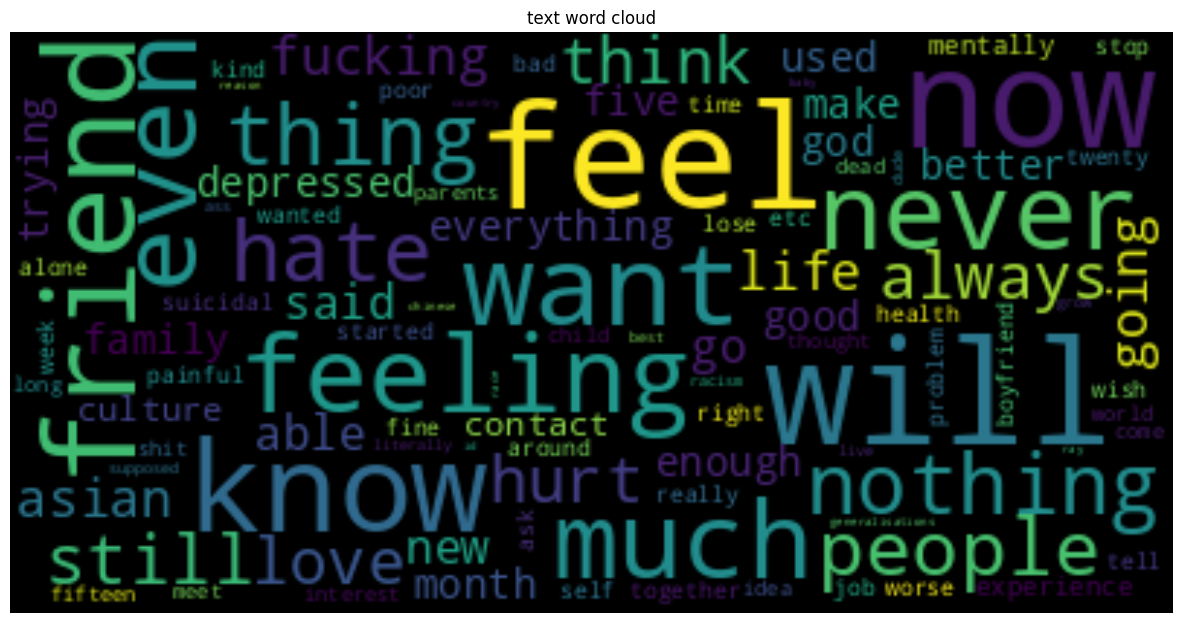

In [31]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(str(work['cleaned_text']))
plt.subplots(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("text word cloud")
plt.show()

### Depression Word Cloud:

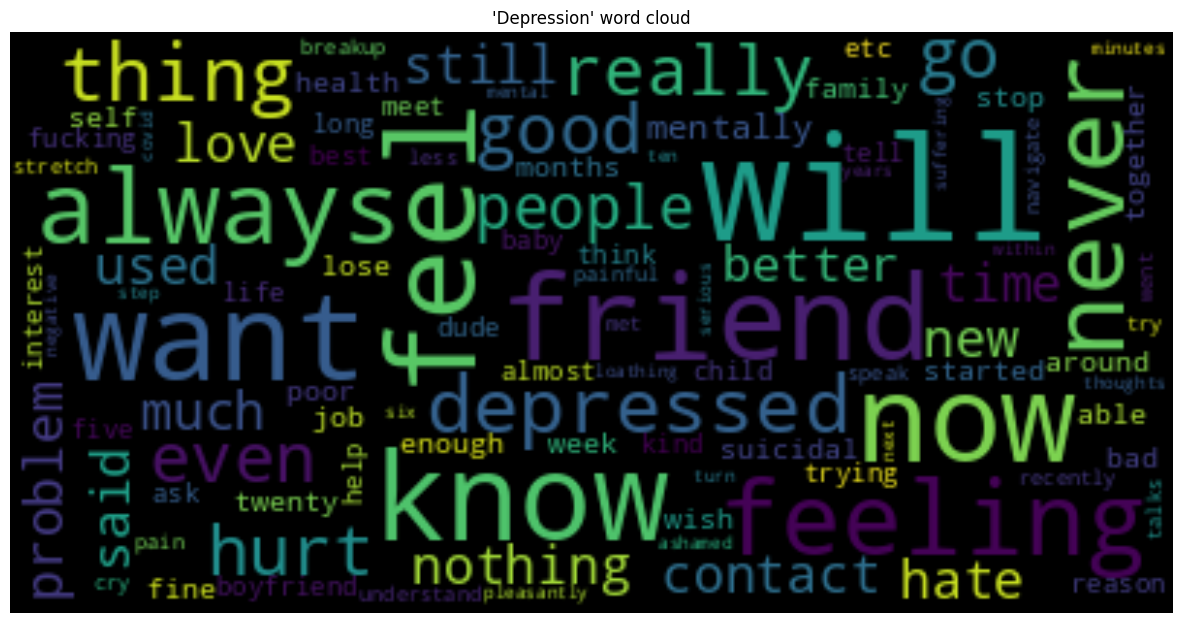

In [32]:
wordcloud_depression = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(str(depression))

plt.subplots(figsize=(15,15))
plt.imshow(wordcloud_depression, interpolation='bilinear')
plt.axis("off")
plt.title("'Depression' word cloud")
plt.show()

### Suicidewatch Wordcloud:

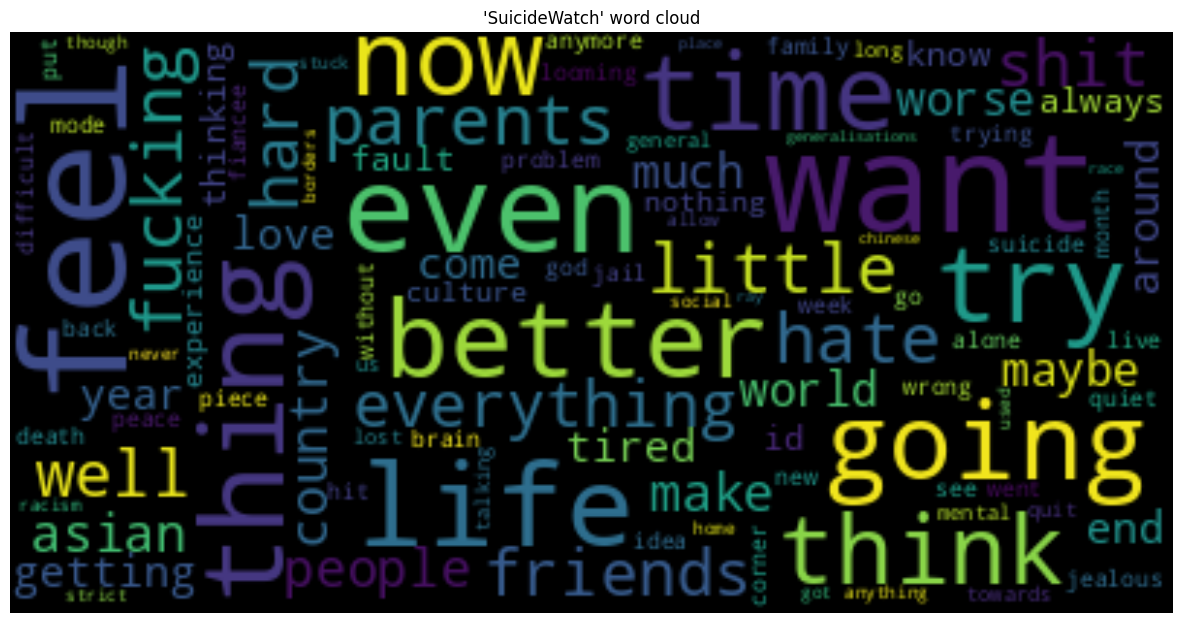

In [33]:
wordcloud_suicide = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(str(suicidewatch))

plt.subplots(figsize=(15,15))
plt.imshow(wordcloud_suicide, interpolation='bilinear')
plt.axis("off")
plt.title("'SuicideWatch' word cloud")
plt.show()


### Feature Engineering:

In [34]:
work['length_text'] = work['text'].apply(lambda x: len(x) - x.count(" "))
work.head()

,text,label,cleaned_text,length_text
0,I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts. I just want to lose feelings so all this pain can stop it hurts so much and I cannot even cry about it. I do not want to hurt her because she said she does not want to never speak to me again but I do not know what to do here. When we were together she always hurt me so I do not know why I still love her. I wish we never met it would be much less painful How do I lose feelings?,depression,i recently went through a breakup and she said she still wants to be friends so i said i can try doing that but when she talks to me about things it always hurts i just want to lose feelings so all this pain can stop it hurts so much and i cannot even cry about it i do not want to hurt her because she said she does not want to never speak to me again but i do not know what to do here when we were together she always hurt me so i do not know why i still love her i wish we never met it would be much less painful how do i lose feelings,424
2,"I do not know how to navigate these feelings, not that its a new feeling by any stretch. I just do not understand how I can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it. I have been suffering from poor mental health for over 10 years and I am about to turn 26 next week and I feel so ashamed for how serious my negative thoughts are. Covid was a hard transition especially having moved to a new city a few months before everything started locking down, but now I am here and settled and I have a loving partner, a great connection to their family, a really fun job and I finished my degree. But when I stop and look around I feel like nothing will ever be good enough for me and I will never be good enough, I will always have skin problems and bad teeth and acne. I will never be the artist I used to be (I have a Bachelor in fine art) because I do not have the same drive or passionate that I used to have for it. I will ...",depression,i do not know how to navigate these feelings not that its a new feeling by any stretch i just do not understand how i can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it i have been suffering from poor mental health for over ten years and i am about to turn twenty six next week and i feel so ashamed for how serious my negative thoughts are covid was a hard transition especially having moved to a new city a few months before everything started locking down but now i am here and settled and i have a loving partner a great connection to their family a really fun job and i finished my degree but when i stop and look around i feel like nothing will ever be good enough for me and i will never be good enough i will always have skin problems and bad teeth and acne i will never be the artist i used to be i have a bachelor in fine art because i do not have the same drive or passionate that i used to have for it i will neve...,1203
3,"So I have been with my bf for 5 months , and he already told me he was depressed. To this week nothing particular happened, but i can now feel hes bothered by it. He does not ask me to sleep together, do things and etcI know I am not the problem I am aware of that, I just wanted to ask: how can I be there without suffocating him? I am really clingy, a thing which he usually loves about me but right now I kind of have a feeling that I am doing too much.Any suggestion will be gladly accepted, be frank and tell me how I can not make it worse: its that that bothers me. My bf (21) is having a bad time due to his depression",depression,so i have been with my boyfriend for five months and he already told me he was depressed to this week nothing particular happened but i can now feel he is bothered by it he does not ask me to sleep toge

[Text(0.5, 1.0, 'Length of a post')]

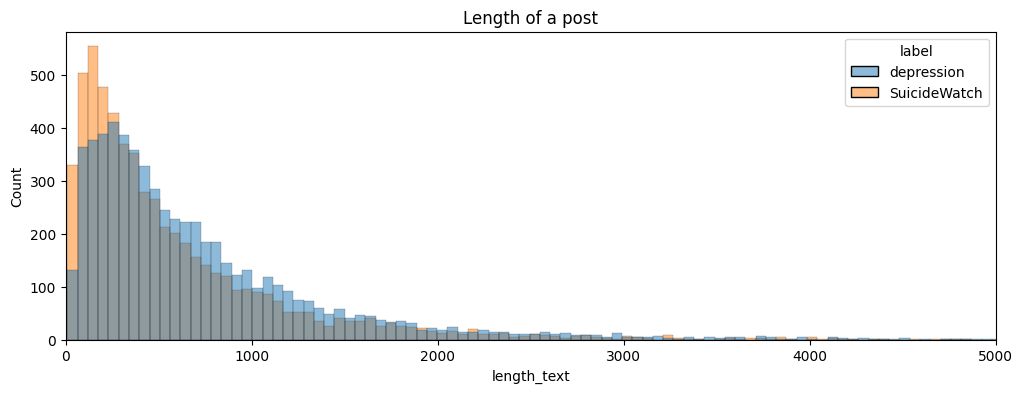

In [35]:
fig,ax = plt.subplots(figsize=(12,4))
sns.histplot(data=work, x="length_text", hue="label")
ax.set(xlim=(0, 5000))
ax.set(title="Length of a post")

### Logarithmic transformation of post length:

In [36]:
work['log_length_text'] = np.log1p(work['length_text'])

[Text(0.5, 1.0, 'Log scale of length of a post')]

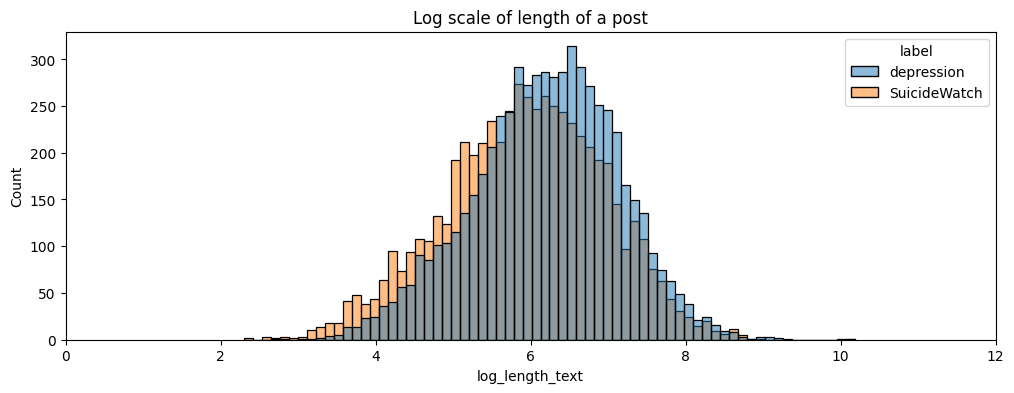

In [37]:
fig,ax = plt.subplots(figsize=(12,4))
sns.histplot(data=work, x="log_length_text", hue="label")
ax.set(xlim=(0, 12))
ax.set(title="Log scale of length of a post")

### Stemming or Lemmatization:

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [40]:
stop_words = ('i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should')

In [41]:
len(stop_words)

134

In [42]:
nltk.download('wordnet')
lemetizer = WordNetLemmatizer()
ps = PorterStemmer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
def lemmatizing(text):
    text = re.sub(r'\d+', '', str(text))
    text = text.split()
    
    text = [ps.stem(word) for word in text if not word in stop_words]
    text = ' '.join(text)
    return text

In [44]:
work['cleaned_text'] = work['cleaned_text'].apply(lambda x: lemmatizing(x))

In [45]:
work

,text,label,cleaned_text,length_text,log_length_text
0,I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts. I just want to lose feelings so all this pain can stop it hurts so much and I cannot even cry about it. I do not want to hurt her because she said she does not want to never speak to me again but I do not know what to do here. When we were together she always hurt me so I do not know why I still love her. I wish we never met it would be much less painful How do I lose feelings?,depression,recent went breakup said still want friend said tri talk thing alway hurt want lose feel pain stop hurt much cannot even cri want hurt said want never speak know togeth alway hurt know still love wish never met would much less pain lose feel,424,6.052089
2,"I do not know how to navigate these feelings, not that its a new feeling by any stretch. I just do not understand how I can go on from being so pleasantly fine to suicidal and self loathing within in minutes and not be able to step out of it. I have been suffering from poor mental health for over 10 years and I am about to turn 26 next week and I feel so ashamed for how serious my negative thoughts are. Covid was a hard transition especially having moved to a new city a few months before everything started locking down, but now I am here and settled and I have a loving partner, a great connection to their family, a really fun job and I finished my degree. But when I stop and look around I feel like nothing will ever be good enough for me and I will never be good enough, I will always have skin problems and bad teeth and acne. I will never be the artist I used to be (I have a Bachelor in fine art) because I do not have the same drive or passionate that I used to have for it. I will ...",depression,know navig feel new feel stretch understand go pleasantli fine suicid self loath within minut abl step suffer poor mental health ten year turn twenti six next week feel asham seriou neg thought covid hard transit especi move new citi month everyth start lock now settl love partner great connect famili realli fun job finish degre stop look around feel like noth ever good enough never good enough alway skin problem bad teeth acn never artist use bachelor fine art drive passion use never career built entir plan around lose interest art never relationship famili want could stand stay hometown feel tornado failur swirl around damn time seem matter mani posit come way last long enough weight neg realli know look guess want say loud whatev zero one hundr,1203,7.093405
3,"So I have been with my bf for 5 months , and he already told me he was depressed. To this week nothing particular happened, but i can now feel hes bothered by it. He does not ask me to sleep together, do things and etcI know I am not the problem I am aware of that, I just wanted to ask: how can I be there without suffocating him? I am really clingy, a thing which he usually loves about me but right now I kind of have a feeling that I am doing too much.Any suggestion will be gladly accepted, be frank and tell me how I can not make it worse: its that that bothers me. My bf (21) is having a bad time due to his depression",depression,boyfriend five month alreadi told depress week noth particular happen now feel bother ask sleep togeth thing etc know problem awar want ask without suffoc realli clingi thing usual love right now kind feel much suggest gladli accept frank tell make wors bother boyfriend twenti one bad time due depress,495,6.206576
4,"I am so exhausted of this. Just when I think I can finally rest, just when I think maybe things are starting to settle, another hurdle comes flying at me. This month alone we found out my mum could be dying, my girlfriend left me, my parents revealed that they wanted a divorce, my grandad was hospitalised again and just now my little sister's been rushed to A&E with possible brain dama

### Vectorization:

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [47]:
work['label'].replace({'depression': 0, 'SuicideWatch': 1},inplace=True)

In [48]:
label = work['label']
label


0        0
2        0
3        0
4        1
5        0
        ..
11994    0
11995    0
11996    1
11997    0
11998    1
Name: label, Length: 11988, dtype: int64

In [49]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
tfidf_vectorizer.fit(work['cleaned_text'])
x = tfidf_vectorizer.transform(work['cleaned_text'])
x_test = tfidf_vectorizer.transform(work['cleaned_text'])

x_train, x_val, y_train, y_val = train_test_split(
    x, label, train_size = 0.75
)

### Model Training:

In [50]:
lr = LogisticRegression(C=0.5)
lr.fit(x_train, y_train)

LogisticRegression(C=0.5)

In [51]:
print ("Accuracy ", accuracy_score(y_val, lr.predict(x_val)))


Accuracy  0.7217217217217218
